In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [3]:
# Dataset: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset/data
!kaggle datasets download -d uciml/sms-spam-collection-dataset

Dataset URL: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
License(s): unknown
  0% 0.00/211k [00:00<?, ?B/s]
100% 211k/211k [00:00<00:00, 81.0MB/s]


In [4]:
import zipfile
zip_ref = zipfile.ZipFile('/content/sms-spam-collection-dataset.zip', 'r')
zip_ref.extractall('/content/drive/MyDrive/google colab/Assignment/SMS_SPAM/data')
zip_ref.close()

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [61]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [78]:
df = pd.read_csv('/content/drive/MyDrive/google colab/Assignment/SMS_SPAM/data/spam.csv', encoding = 'latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [79]:
class_counts = df['v1'].value_counts()
print(class_counts)

v1
ham     4825
spam     747
Name: count, dtype: int64


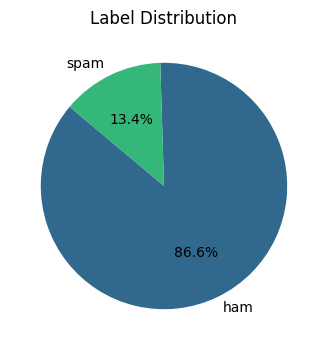

In [80]:
plt.figure(figsize=(4, 4))
plt.pie(class_counts,
        labels=class_counts.index,
        autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette("viridis", len(class_counts)))
plt.title('Label Distribution')
plt.show()

In [81]:
#remove the redundant features
drop_features = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']

df.drop(drop_features, axis=1, inplace=True)

print(df.columns)

Index(['v1', 'v2'], dtype='object')


In [82]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [83]:
column_name = ['email', 'label']

df = pd.DataFrame({column_name[0]: df['v2'], column_name[1]: df['v1']})
df.head()

,email,label
0,"Go until jurong point, crazy.. Available only ...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup fina...,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives aro...",ham


In [84]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])
df.head()

,email,label
0,"Go until jurong point, crazy.. Available only ...",0
1,Ok lar... Joking wif u oni...,0
2,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,U dun say so early hor... U c already then say...,0
4,"Nah I don't think he goes to usf, he lives aro...",0


## **Data Preprocessing**

In [90]:
#Data cleaning and preprocessing
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [91]:
lemmatizer = WordNetLemmatizer()

corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['email'][i])
    review = review.lower()
    review = word_tokenize(review)

    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [93]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(corpus).toarray()

y=pd.get_dummies(df['label'])
y=y.iloc[:,1].values
y

array([False, False,  True, ..., False, False, False])

## **Train Test Split**

In [97]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## **Naive bayes classifier**

In [104]:
from sklearn.naive_bayes import MultinomialNB

mv = MultinomialNB();
model_1 = mv.fit(X_train, y_train)
model_1.score(X_test, y_test)

0.9838565022421525

## **Logistic Regression**

In [103]:
from sklearn.linear_model import LogisticRegression

model_2 = LogisticRegression(class_weight='balanced',random_state=0, max_iter=1000)
model_2.fit(X_train,y_train)
model_2.score(X_test,y_test)

0.9856502242152466

## **Decision Tree**

In [105]:
from sklearn.tree import DecisionTreeClassifier

model_3 = DecisionTreeClassifier()
model_3.fit(X_train,y_train)
model_3.score(X_test,y_test)

0.9721973094170404

## **Random Forest**

In [106]:
from sklearn.ensemble import RandomForestClassifier

model_4 = RandomForestClassifier(n_estimators=100,criterion='gini',)
model_4.fit(X_train,y_train)
model_4.score(X_test,y_test)

0.9766816143497757

## **Model Evaluation**

In [107]:
models = [model_1, model_2, model_3, model_4]
models_name = ['Naive Bayes','Logistic Regression','Decision Tree', 'Random Forest']

In [108]:
from sklearn.metrics import classification_report

models_classification_report = []
models_prediction = []
for model in models:
    y_pred = model.predict(X_test)
    models_prediction.append(y_pred)
    report = classification_report(y_test, y_pred)
    models_classification_report.append(report)

In [109]:
for index in range(len(models_classification_report)):
    print("-----------------------------------------------------")
    print("\t\t\t",models_name[index])
    print(models_classification_report[index])
    print("\n\n\n")

-----------------------------------------------------
			 Naive Bayes
              precision    recall  f1-score   support

       False       0.99      0.99      0.99       949
        True       0.94      0.95      0.95       166

    accuracy                           0.98      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.98      0.98      0.98      1115





-----------------------------------------------------
			 Logistic Regression
              precision    recall  f1-score   support

       False       0.99      1.00      0.99       949
        True       0.97      0.93      0.95       166

    accuracy                           0.99      1115
   macro avg       0.98      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115





-----------------------------------------------------
			 Decision Tree
              precision    recall  f1-score   support

       False       0.98      0.99      0.98       949
        T

		 Naive Bayes


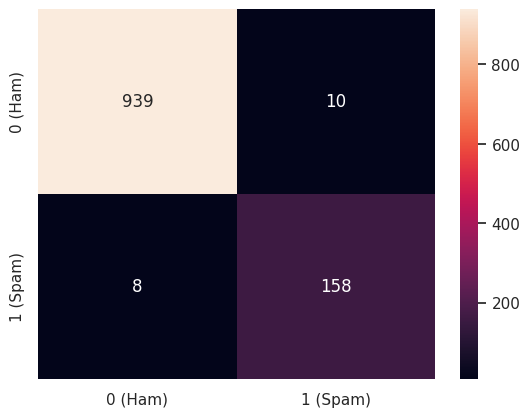




		 Logistic Regression


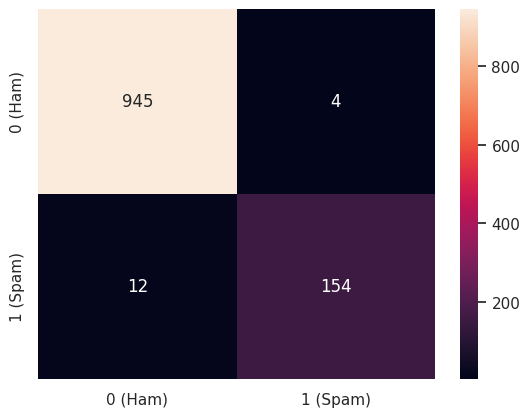




		 Decision Tree


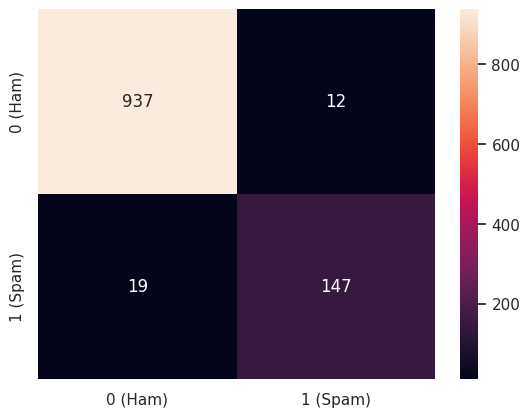




		 Random Forest


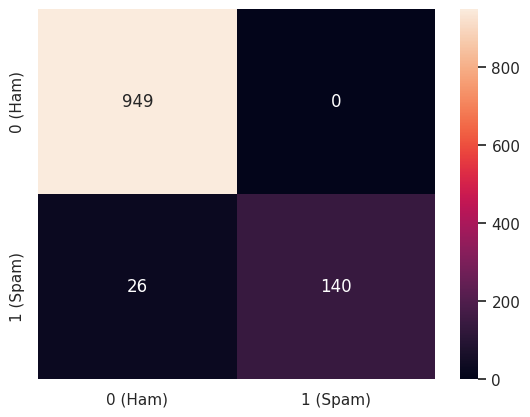

In [111]:
class_labels = ['0 (Ham)','1 (Spam)']
sns.set()
for index in range(len(models_prediction)):
    print("\t\t",models_name[index])
    cm = confusion_matrix(y_test, models_prediction[index])
    sns.heatmap(cm,annot=True,fmt='d', xticklabels=class_labels, yticklabels=class_labels)
    plt.show()
    print("\n\n")